Se hace la prueba inicial con la imagen A4505-NGC2346
que contiene 2 espectros.

In [1]:
from __future__ import division             # hace que se utilice la división en punto flotante
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2 


In [3]:
from astropy.io import fits

hdu_list = fits.open('fits/A4505-NGC2346.fits')
hdu_list.info()
#La informacion anterior(file fits) como una matriz(dimension de la imagen)
image_data = hdu_list[0].data #info ppal de cabecera 
print(type(image_data))
print(image_data.shape)

Filename: fits/A4505-NGC2346.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (1065, 2736)   int16   
<class 'numpy.ndarray'>
(2736, 1065)


Notar que la dimension almacenada en la metadat indica 1065 * 2736,
cuando en realidad, numpy indica una dimension de (2736, 1065).
Por lo tanto, se debe revisar tales datos.

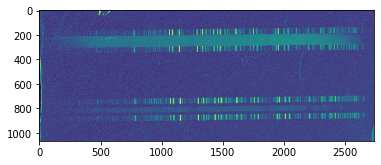

In [11]:
#hdu_list[0].header
plt.imshow(hdu_list[0].data.T)

Según lo anterior el X es de 0-2736 y el Y es de 0-1065

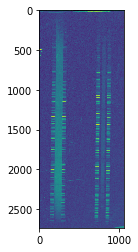

In [12]:
plt.imshow(hdu_list[0].data)

In [32]:
matriz= hdu_list[0].data  #matriz de datos

In [20]:
image_data.max(), image_data.min()

(21575, -23641)

C:\Users\Kathe\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:


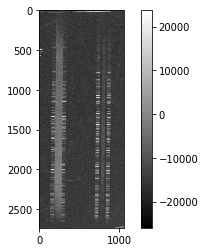

In [24]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [25]:
from scipy import ndimage
blurred_image = ndimage.gaussian_filter(image_data, sigma=3)

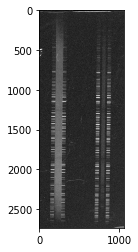

In [26]:
plt.imshow(blurred_image, cmap='gray')


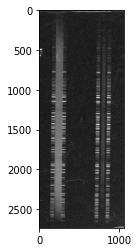

In [27]:
very_blurred = ndimage.gaussian_filter(image_data, sigma=5)
plt.imshow(very_blurred, cmap='gray')

In [39]:
vect= np.apply_along_axis(sum, 0, matriz) #suma columnas

In [44]:
len(vect),vect.max(), vect.min()

(1065, -15016380, -41516454)

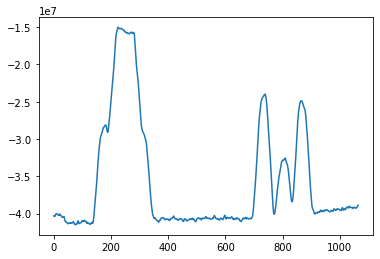

In [43]:
plt.plot(range(0,len(vect)),vect)

In [47]:
vect.mean()

-35714692.21220657

532
Periodo de primer escalon: 184
Periodo de segundo escalon: 150


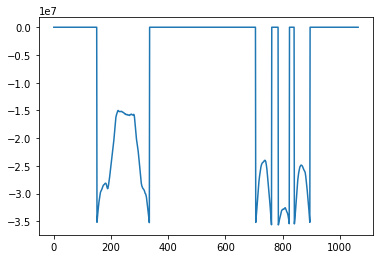

In [75]:
#np.convolve(vect,len(vect))
#np.r_[True,vect[1:]<vect[:-1]] & np.r_[vect[:-1]<vect[1:],True]
v= []
pos_ini=0
pos_fin=0

for valor in vect:
    if valor > vect.mean():
        v.append(valor)
    else:
        v.append(0)
#plt.plot(range(0,len(v)),v)

k=0

import math
deci,ent=  math.modf(len(v)/2)
ent = int(ent)
print(ent)
for i in range(0,ent):
    if (v[i] != 0):
        k += 1

print("Periodo de primer escalon: "+ str(k))

l=0
for i in range(ent,len(v)):
    if (v[i] != 0):
        l += 1  
print("Periodo de segundo escalon: "+str(l))


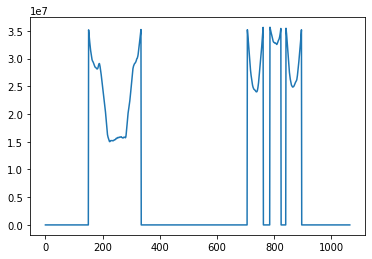

In [78]:
v= np.abs(v)
plt.plot(range(0,len(v)),v)


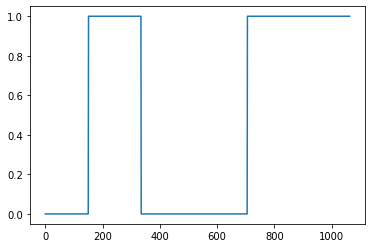

In [88]:
c=0
v_caja= []
for i in range(0,len(v)):
    if (v[i] != 0):
        if c < k: 
            c += 1
            v_caja.append(1)
        else:
            c = 0
    else:
        if (c < k) & (c != 0): 
            c += 1
            v_caja.append(1)
        else:
            if c == k:
                c = 0
            v_caja.append(0)
plt.plot(range(0,len(v_caja)),v_caja)

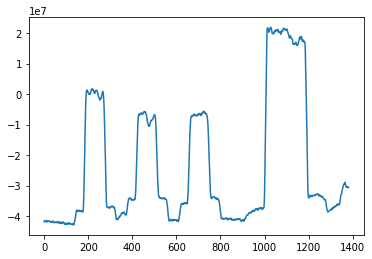

In [93]:
hdu_list = fits.open('fits/A4451-HD166734.fits')
#hdu_list.info()
#La informacion anterior(file fits) como una matriz(dimension de la imagen)
matriz_2 = hdu_list[0].data #info ppal de cabecera 
vect_2= np.apply_along_axis(sum, 0, matriz_2) #suma columnas
len(vect_2),vect_2.max(),vect_2.min()
plt.plot(range(0,len(vect_2)),vect_2)